In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


In [34]:
data = pd.read_pickle('dh_mi_dataset.pkl')
data.death = data.death.astype('int16')



In [35]:
data


,stay_id,wbc,rbc,hematocrit_x,hemoglobin_x,mch,mchc,mcv,rdw,platelet,inr,pt,ptt,death
0,30000153,16.100000,3.185000,30.957143,10.300000,32.400000,33.900000,95.500000,13.400000,167.500000,1.100000,13.200000,25.299999,0
1,30000484,21.800000,2.815000,25.700000,8.550000,30.400000,33.250000,91.500000,18.100000,345.000000,1.400000,16.100000,38.849998,0
2,30000646,8.550000,4.362500,38.700000,13.100000,30.000000,33.824999,88.750000,15.225000,275.250000,1.400000,15.200000,35.200001,1
3,30001148,11.300000,3.385000,31.566667,10.900000,32.300000,34.200001,94.500000,14.050000,187.500000,1.200000,13.600000,29.500000,0
4,30001336,7.966667,2.990000,26.566666,8.866666,29.666667,33.400000,89.000000,12.000000,171.333333,1.466667,16.033333,60.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62369,39999230,5.766667,2.710000,26.033333,8.266667,30.566667,31.900000,96.000000,15.166667,199.666667,1.900000,20.533333,38.700001,0
62370,39999286,16.400000,3.383333,30.575000,10.533333,31.066667,33.966667,91.333333,15.600000,139.000000,1.000000,11.800000,31.000000,0
62371,39999301,9.450000,3.915000,35.399999,12.350000,31.450000,34.299999,92.000000,14.400000,194.500000,1.100000,13.400000,26.500000,1
62372,39999552,8.800000,3.593333,32.760001,11.200000,31.233333,34.000000,92.000000,13.933333,175.333333,1.100000,12.300000,29.400000,0


In [36]:
data.describe().astype('int').T


,count,mean,std,min,25%,50%,75%,max
stay_id,62374,34993119,2888112,30000153,32492381,34994723,37492863,39999810
wbc,62374,11,8,0,7,10,14,464
rbc,62374,3,0,1,3,3,3,7
hematocrit_x,62374,31,5,10,27,30,35,65
hemoglobin_x,62374,10,1,3,8,10,11,20
mch,62374,29,2,15,28,30,31,47
mchc,62374,32,1,24,31,33,34,45
mcv,62374,91,6,53,87,91,95,135
rdw,62374,15,2,10,13,14,16,33
platelet,62374,200,106,5,132,183,247,1970


In [37]:
corr=data.corr()
corr[corr>0.7]


,stay_id,wbc,rbc,hematocrit_x,hemoglobin_x,mch,mchc,mcv,rdw,platelet,inr,pt,ptt,death
stay_id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wbc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rbc,NaN,NaN,1.000000,0.913213,0.887919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hematocrit_x,NaN,NaN,0.913213,1.000000,0.961761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hemoglobin_x,NaN,NaN,0.887919,0.961761,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mch,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.827421,NaN,NaN,NaN,NaN,NaN,NaN
mchc,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mcv,NaN,NaN,NaN,NaN,NaN,0.827421,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
rdw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
platelet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


<AxesSubplot:>

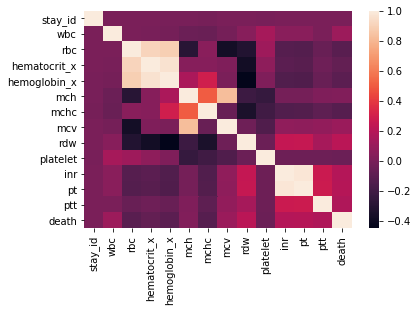

In [38]:
sns.heatmap(corr)


In [39]:
from lightgbm import LGBMClassifier
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report,roc_curve, accuracy_score,precision_score,recall_score
from sklearn.pipeline import Pipeline


In [40]:
# make dataset
#X_r =data[['wbc','rbc','hematocrit_x','hemoglobin_x','mch','mchc','mcv','rdw','platelet','inr','pt','ptt']]
X_r =data[['wbc','rbc','mchc','mcv','rdw','platelet','pt','ptt']]
y_r = data['death']
#smote(unsampling)
smote = SMOTE(random_state = 101)
X,y = smote.fit_resample(X_r,y_r)

X_train_r, X_test_r, y_train, y_test = train_test_split(X_s, y, test_size=0.2, random_state=7)




Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='death', ylabel='count'>

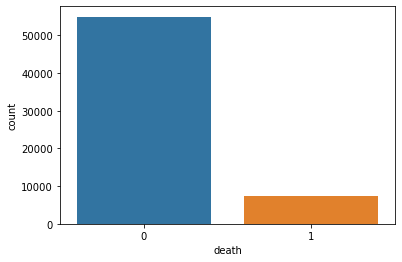

In [41]:
sns.countplot(y_r)



Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='death', ylabel='count'>

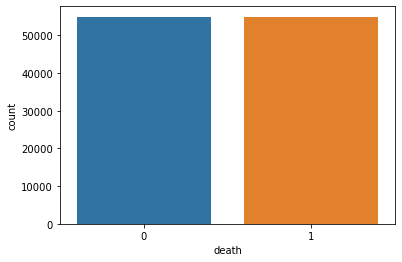

In [42]:
sns.countplot(y)



In [43]:
#scailing
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train_r)
X_test = scalar.fit_transform(X_test_r)



In [44]:
#tuning
base_params = {
    "boosting_type": "gbdt" ,
    "objective": "binary" , 
    "metric": "binary_logloss" , 
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}
param_gird = {
    "learning_rate":[0.01,0.05],
    "max_bin":[512,1000,1500,2000],
    "num_leaves":[80,100,200,250],
    "min_data_in_leaf":[10,20]
}

model = LGBMClassifier(**base_params)

# pipeline
pipe = Pipeline(steps=[
    ('scalar',StandardScaler()),
    ('base_model', model)
])

grid_model = GridSearchCV(estimator=model, param_grid=param_gird, cv=5, n_jobs=5)
grid_model.fit(X_train,y_train)


KeyboardInterrupt: 

In [23]:
print(grid_model.score(X_train,y_train))
print(grid_model.score(X_test,y_test))


0.9086151185545898
0.8746700646218258


In [24]:
es=grid_model.best_estimator_
es

LGBMClassifier(boost_from_average=True, learning_rate=0.05, max_bin=2000,
               metric='binary_logloss', min_data=100, min_data_in_leaf=10,
               num_leaves=250, objective='binary', verbose=-1)

In [25]:
lgbm = LGBMClassifier(**grid_model.best_params_)


In [26]:
lgbm.fit(X_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


LGBMClassifier(learning_rate=0.05, max_bin=2000, min_data_in_leaf=10,
               num_leaves=250)

In [27]:
y_pred = lgbm.predict(X_test)


In [45]:
params = {
    "max_bin": 512,
    "learning_rate": 0.01 , ### epsilon 
    "boosting_type": "gbdt" , ### gradient boosting 
    "objective": "binary" , ### 
    "metric": "binary_logloss" , ###
    "num_leaves": 100,
    "verbose": -1,
    "min_data": 100,
    "boost_from_average": True
}

In [46]:
lgbm2 = LGBMClassifier(**params)


In [47]:
lgbm2.fit(X_train,y_train)


[LightGBM] [Warning] min_data_in_leaf is set with min_data=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


LGBMClassifier(boost_from_average=True, learning_rate=0.01, max_bin=512,
               metric='binary_logloss', min_data=100, num_leaves=100,
               objective='binary', verbose=-1)

In [48]:
y_pred2 = lgbm2.predict(X_test)


In [49]:
roc_auc_score(y_test,y_pred2)


0.7307421522351527

In [50]:
explainer =  shap.TreeExplainer(lgbm)
shap_values =  explainer.shap_values(X)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


KeyboardInterrupt: 

In [101]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X.iloc[0,:])


In [102]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][:1000,:], X.iloc[:1000,:])


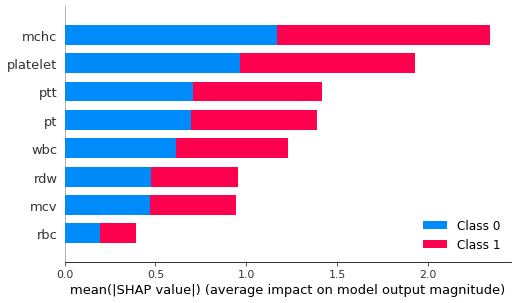

In [103]:
# case value_counts
shap.initjs()
shap.summary_plot(shap_values, X)


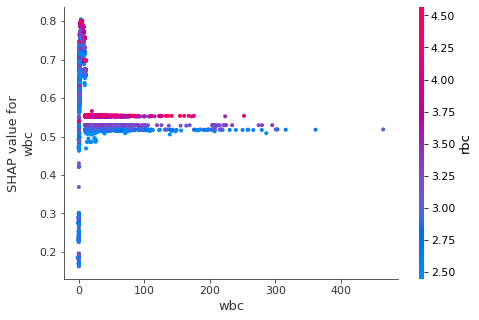

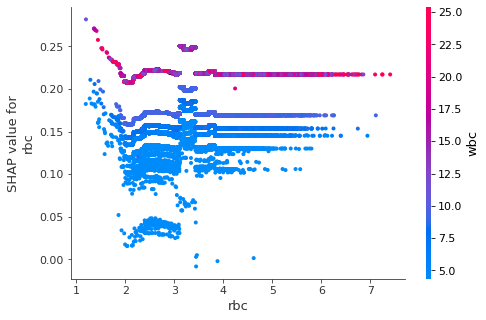

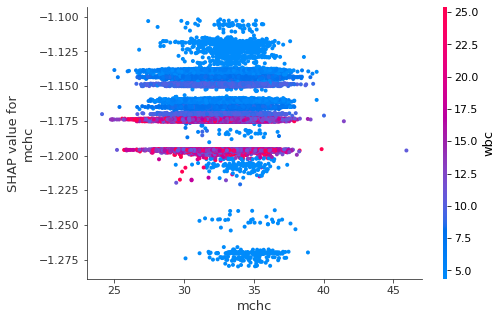

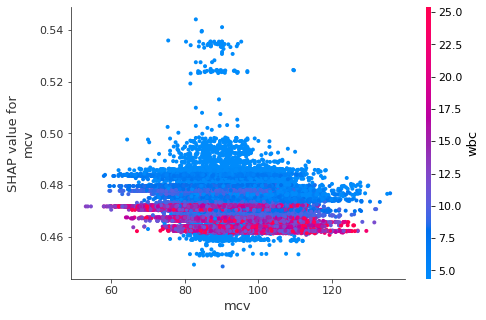

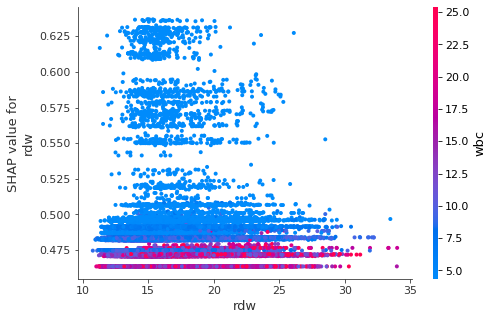

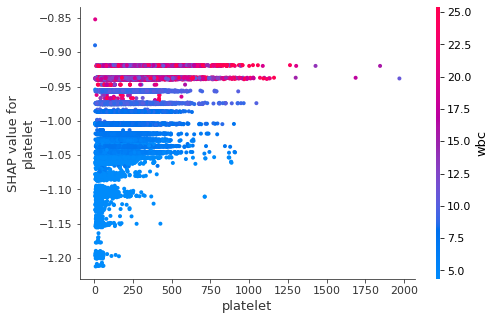

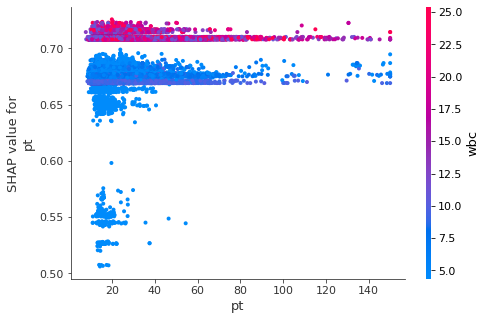

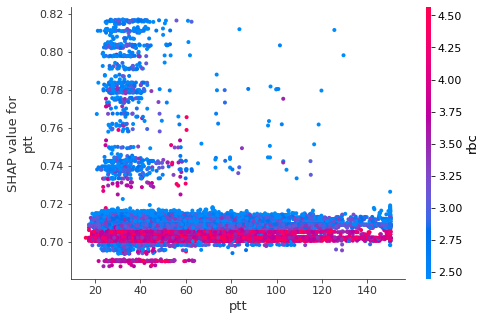

In [110]:
for name in pd.DataFrame(X_train).columns:
    shap.dependence_plot(name, shap_values[1], X, display_features=X)
    

In [28]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.87      0.87     11038
           1       0.87      0.88      0.87     10936

    accuracy                           0.87     21974
   macro avg       0.87      0.87      0.87     21974
weighted avg       0.87      0.87      0.87     21974



In [51]:
print(classification_report(y_test,y_pred2))


              precision    recall  f1-score   support

           0       0.74      0.71      0.73     11038
           1       0.72      0.75      0.74     10936

    accuracy                           0.73     21974
   macro avg       0.73      0.73      0.73     21974
weighted avg       0.73      0.73      0.73     21974



In [53]:
[fpr, tpr, thr] = roc_curve(y_test, y_pred)
print('Train/Test split results:')
print(" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(" log_loss is %2.3f" % log_loss(y_test, y_pred))
print(" auc is %2.3f" % auc(fpr, tpr))
idx = np.min(np.where(tpr > 0.95)) 
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

Train/Test split results:
 accuracy is 0.875


NameError: name 'log_loss' is not defined